## Mfundo Monchwe
### 1645850
### Build Neural network from scratch with Backpropagation
### Assignment II

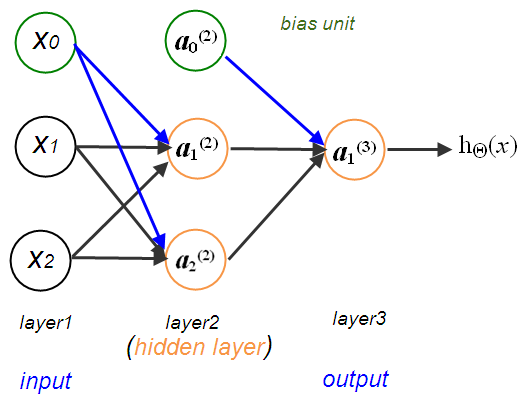


Given the NN diagram above, follow definitions for the notations:
1. $ a_i^{(j)}$ : activation  of unit $i$ in layer $j$

2. $\Theta^{j}$ : matrix of weighrs controlliing funcition mapping from layer $j$ to layer $j+1$

Below are the computations reprensented by the NN above:
$$a_0^{(2)} = g(\Theta_{00}^{(1)}x_0 + \Theta_{01}^{(1)}x_1 + \Theta_{02}^{(1)}x_2) = g(\Theta_0^Tx) = g(z_0^{(2)})
$$
$$a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2) = g(\Theta_1^Tx) = g(z_1^{(2)})
$$
$$a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2) = g(\Theta_2^Tx) = g(z_2^{(2)})
 $$
 
 $$ h_\Theta(x) = a_1^{(3)}=g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)})
$$

in the equations above, the $g$ is `Sigmoid` function that refers to the special case of the logistic function defined by the formul:

$$ g(z) = \frac{1}{1+e^{-z}}
 $$
 
 
 ### Forward Propagation
 Use matrix notation, the equations of previous section become:
 
 $$x = 
       \begin{bmatrix}
        x_0 \\
        x_1 \\
        x_2 \\
        \end{bmatrix}  
        z^{(2)} = 
       \begin{bmatrix}
        z_0^{(2)} \\
        z_1^{(2)} \\
        z_2^{(2)} \\
        \end{bmatrix}
 $$
 
 $$ z^{(2)} = \Theta^{(1)}x = \Theta^{(1)}a^{(1)}
$$
$$a^{(2)} = g(z^{(2)})
 $$
 $$ a_0^{(2)} = 1.0
$$
$$z^{(3)} = \Theta^{(2)}a^{(2)}
 $$
 $$h_\Theta(x) = a^{(3)} = g(z^{(3)})
 $$
 
 ### Back Propoagation (Gradient Computation)
 The backpropagation learning algorithm can be divided into two phases: propagation and weight update.
 
 1. Phase 1: Propagation
 
 Each propagation involves the following steps:
     1. Forward propagation of the input of a training pattern through the neural network to create the propagation's output activations.
     
    2. Backward propagation of the propagation's output activations through the neural network using the training pattern target in order to generate the delatas of all output and hidden neurons
    
 2. Phase 2: Weight update
 
 For each weight-sypnapse following steps:
 
     1. Multiply its output delta and input activation to get the gradient of the weight.
     
     2. Subtract a ratio(%) of the gradient from the weight.
     
This percentage ratio effects the pace and quality of learning; it is referred to as the learning rate. The quicker the neuron trains, the higher the ratio; the lower the ratio, the more precise the training. Because the sign of a weight's gradient shows where the mistake is rising, the weight must be updated in the opposite way.
Rep phases 1 and 2 till the network's performance is adequate.

suppose denote an error of node $j$ in layer $l$ as $\delta^{l}_{j}$ for the output unit (L=3) becomes activation actual value:

$$ \delta_j^{(3)} = a_j^{(3)} - y_j = h_\Theta(x) - y_j
 $$
Suppose use vector form, it is:
$$\delta^{(3)} = a^{(3)} - y
 $$
 $$ \delta^{(2)} = (\Theta^{(2)})^T \delta^{(3)} \cdot g^{'}(z^{(2)})
$$
where:
$$ g^{'}(z^{(2)}) = a^{(2)} \cdot (1-a^{(2)})
$$

Do note, do not have $\delta^{(1)}$ term simply that's the input layer and the values are the ones that observed and being used as a training set. Thus, no errors associate with the input.

The derivative of cost function can be written like this:
$$\frac{\partial}{\partial{\Theta_{ij}^{(l)}}} J(\Theta) = a_j^{(l)}\delta_i^{(l+1)}
 $$
 By using this value to update weights, can multiply learning rate before adjusting the weight

In [17]:
import numpy as np # for linear algebra and calculus
import matplotlib.pyplot as plt # plots

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prim(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prim(x):
    return 1.-x**2

class Neuralnetwork:
    
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.actiivation = sigmoid
            self.activation_prim = sigmoid_prim
            
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prim = tanh_prim
            
            
        #Set weights
        self.weights = []
        #layers = [2,2,1]
        #range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)): 3by3
        for i in range(1, len(layers) -1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] +1)) -1
            self.weights.append(r)
        #out put layer -random(2+1,1): 3by1
        r = 2*np.random.random((layers[i]+1, layers[i+1])) -1
        self.weights.append(r)
        
    def fit(self,X,y,lr=0.5, epochs=10000):
        #add column of ones to X
        #add bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            
            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
            #outpuut layer
            error = y[i] -a[-1]
            deltaa = [error * self.activation_prim(a[-1])]
            
            #From second layer to the last layer
            for l in range(len(a) -2, 0, -1):
                deltaa.append(deltaa[-1].dot(self.weights[l].T)*self.activation_prim(a[l]))
                
            #reverse
            #[lvl3(output)-> lvl2(hidden)] ==>[lvl2(hidden)->lvl3(output)]
            deltaa.reverse()
            
            #Backpropagation
            # follow the phase 2 mentioned above
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltaa[i])
                self.weights[i] += lr * layer.T.dot(delta)
                
            if k % 1000 == 0: print ('epochs:', k)
                
    def predict(self,x):
        
        a = np.concatenate((np.array([[1]]), np.array([x])), axis=1)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
            return a
        
if __name__ == '__main__':
    
    nn = Neuralnetwork([2,2,1])
    X = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
    y = np.array([0,1,1,0])
    nn.fit(X,y)
    for e in X:
        print(e,nn.predict(e))
                
                
            

epochs: 0
epochs: 1000
epochs: 2000
epochs: 3000
epochs: 4000
epochs: 5000
epochs: 6000
epochs: 7000
epochs: 8000
epochs: 9000
[0 0] [[ 0.78096969 -0.2687237   0.97409546]]
[0 1] [[-0.92356741 -0.69139426  0.51329955]]
[1 0] [[-0.92941027 -0.498579    0.44311057]]
[1 1] [[-0.99964249 -0.80845322 -0.8087585 ]]


### Activation Functions

- In neural network, the activation function of a node determines whether the node would activate the output given the **weighted sum of the input values**. 

- Different types of activation functions may determine the cut-offs for output activation in different ways.


- **Sigmoid** function: This function converts the $y$ values into values within the range of 0 and 1 (i.e., a probability-like value).

$$ h(y) = \frac{1}{1 + \exp(-y)}$$


- **Step** function: This function converts the $y$ values into binary ones, with only the positive values activated.

$$ h(y)= \left\{ 
     \begin{array}\\
     0 & (y \leq 0) \\
     1 & (y > 0)
     \end{array}
\right.
$$

- **ReLU** (Rectified Linear Unit) function: This function converts the $y$ values by passing only positive values and zero for negative $y$.

$$ h(y)= \left\{ 
     \begin{array}\\
     y & (y > 0) \\
     0 & (y \leq 0)
     \end{array}
\right.
$$

- **Softmax** function: This function converts the $y$ values into normalized probability values.

$$
h(y_k) = \frac{\exp(y_k)}{\sum_{i = 1}^{n} \exp({y_i})}
$$

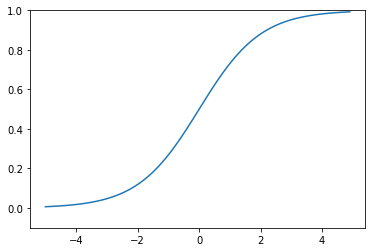

In [19]:
#sigmoid func
x = np.arange(-5,5,0.1)
plt.plot(x,sigmoid(x))
plt.ylim(-.1,1)
plt.show()

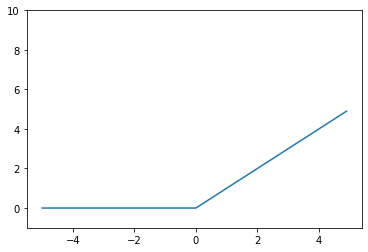

In [21]:
def relu(x):
    return np.maximum(0,x)

plt.plot(x,relu(x))
plt.ylim(-1,10)
plt.show()
